- Insert necessary library


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import matplotlib.pyplot as plt
import requests
import pandas as pd
import re
import numpy as np
import warnings
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
warnings.filterwarnings('ignore')


**1. Compute the energy consumption of each type vehicle**

In [3]:
# Correct file path (remove extra space in 'Deakin /2025')
file_path = '/content/drive/MyDrive/SIT764/Data/merge_data.csv'
# Read the Excel file
final_merge_data = pd.read_csv(file_path)

# Display the first 5 rows
final_merge_data.head(5)


,ObjId,Station name,Station address,Opening hours,Operator,Number of station,Number of plugs,Charger rating,Tesla,Type 2,...,hour_21,hour_22,hour_23,station_id,suburb,rms_region,Date,Avg_Temp,Avg_Humidity,Avg_Wind
0,1,Curlew Retreat,"399 Wylie Creek Rd, Maryland NSW 2372, Australia",Open 24/7,NaN,1,1,kW,1,0,...,1.0,1.0,1.0,T0261,Casino,Northern,2020-04-26,21.00,54.59,18.35
1,1,Curlew Retreat,"399 Wylie Creek Rd, Maryland NSW 2372, Australia",Open 24/7,NaN,1,1,kW,1,0,...,8.0,12.0,3.0,T0261,Casino,Northern,2020-04-04,22.21,56.98,31.44
2,1,Curlew Retreat,"399 Wylie Creek Rd, Maryland NSW 2372, Australia",Open 24/7,NaN,1,1,kW,1,0,...,3.0,5.0,4.0,T0261,Casino,Northern,2020-04-16,23.09,56.36,16.45
3,1,Curlew Retreat,"399 Wylie Creek Rd, Maryland NSW 2372, Australia",Open 24/7,NaN,1,1,kW,1,0,...,2.0,9.0,5.0,T0261,Casino,Northern,2020-04-02,22.06,81.27,15.65
4,1,Curlew Retreat,"399 Wylie Creek Rd, Maryland NSW 2372, Australia",Open 24/7,NaN,1,1,kW,1,0,...,8.0,4.0,5.0,T0261,Casino,Northern,2020-04-16,23.09,56.36,16.45


In [4]:
final_merge_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283910 entries, 0 to 3283909
Data columns (total 56 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   ObjId                   int64  
 1   Station name            object 
 2   Station address         object 
 3   Opening hours           object 
 4   Operator                object 
 5   Number of station       int64  
 6   Number of plugs         int64  
 7   Charger rating          object 
 8   Tesla                   int64  
 9   Type 2                  int64  
 10  Latitude                float64
 11  Longitude               float64
 12  nearest_station_id      object 
 13  distance_km             float64
 14  station_key             int64  
 15  traffic_direction_seq   int64  
 16  cardinal_direction_seq  int64  
 17  classification_seq      int64  
 18  date                    object 
 19  year                    int64  
 20  month                   int64  
 21  day_of_week             int64  

In [5]:
# Drop all unecessary values
filtered_data = final_merge_data.drop(columns=['Operator','Station address','date','year','month','station_key','distance_km','nearest_station_id','Opening hours','station_id','Tesla','rms_region','suburb','cardinal_direction_seq','traffic_direction_seq','Type 2','Charger rating'])
filtered_data.head(5)

,ObjId,Station name,Number of station,Number of plugs,Latitude,Longitude,classification_seq,day_of_week,public_holiday,school_holiday,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Date,Avg_Temp,Avg_Humidity,Avg_Wind
0,1,Curlew Retreat,1,1,-28.558403,152.108476,3,7,False,True,...,6.0,4.0,1.0,1.0,1.0,1.0,2020-04-26,21.00,54.59,18.35
1,1,Curlew Retreat,1,1,-28.558403,152.108476,2,6,False,False,...,30.0,21.0,12.0,8.0,12.0,3.0,2020-04-04,22.21,56.98,31.44
2,1,Curlew Retreat,1,1,-28.558403,152.108476,3,4,False,True,...,13.0,7.0,6.0,3.0,5.0,4.0,2020-04-16,23.09,56.36,16.45
3,1,Curlew Retreat,1,1,-28.558403,152.108476,2,4,False,False,...,38.0,32.0,19.0,2.0,9.0,5.0,2020-04-02,22.06,81.27,15.65
4,1,Curlew Retreat,1,1,-28.558403,152.108476,3,4,False,True,...,11.0,9.0,5.0,8.0,4.0,5.0,2020-04-16,23.09,56.36,16.45


In [6]:
#Check missing values
filtered_data.isna().sum()

,0
ObjId,0
Station name,0
Number of station,0
Number of plugs,0
Latitude,0
Longitude,0
classification_seq,0
day_of_week,0
public_holiday,0
school_holiday,0


In [7]:
#Check duplicated value
filtered_data.duplicated().sum()

np.int64(25)

In [8]:
#Filling the missing values of hour using the linear interpolation
hour_cols = [f'hour_{str(i).zfill(2)}' for i in range(24)]

#Caclulate new daily_total
filtered_data['daily_total'] = filtered_data[hour_cols].sum(axis=1, skipna=True)


In [10]:
# Print the first 5 row of the dataset
filtered_data.head(5)

,ObjId,Station name,Number of station,Number of plugs,Latitude,Longitude,classification_seq,day_of_week,public_holiday,school_holiday,...,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,Date,Avg_Temp,Avg_Humidity,Avg_Wind
0,1,Curlew Retreat,1,1,-28.558403,152.108476,3,7,False,True,...,6.0,4.0,1.0,1.0,1.0,1.0,2020-04-26,21.00,54.59,18.35
1,1,Curlew Retreat,1,1,-28.558403,152.108476,2,6,False,False,...,30.0,21.0,12.0,8.0,12.0,3.0,2020-04-04,22.21,56.98,31.44
2,1,Curlew Retreat,1,1,-28.558403,152.108476,3,4,False,True,...,13.0,7.0,6.0,3.0,5.0,4.0,2020-04-16,23.09,56.36,16.45
3,1,Curlew Retreat,1,1,-28.558403,152.108476,2,4,False,False,...,38.0,32.0,19.0,2.0,9.0,5.0,2020-04-02,22.06,81.27,15.65
4,1,Curlew Retreat,1,1,-28.558403,152.108476,3,4,False,True,...,11.0,9.0,5.0,8.0,4.0,5.0,2020-04-16,23.09,56.36,16.45


In [11]:
energy_consumption_EV= pd.read_csv('/content/drive/MyDrive/SIT764/Dataset/Vehicle_Specifications_MAR_25.csv')

# Display the first 5 rows
energy_consumption_EV.head(5)

,VEHICLE TYPE,FUEL TYPE,MODEL,VARIANT DETAILS,LISTED PRICE ($AUD),FAST CHARGE TIME (minutes),ANCAP RATING,ANCAP VAN RATING,RANGE (km),ENERGY CONSUMPTION
0,Large SUV,BEV,Audi e-tron,2022 Audi e-tron 55 Auto quattro MY23,NaN,"85 mins (5%-80% charge, 50kW charger)","5 star, 2019",NaN,459.0,23.2
1,Large Car,BEV,Audi e-tron GT,2024 Audi e-tron GT Auto e-quattro MY24,181784,"23 mins (5%-80% charge, 270kW charger)",Unrated,NaN,540.0,19.2
2,Large Car,BEV,BMW 5 Series BEV,2024 BMW i5 eDrive40 M Sport G60 Auto,155900,"30 mins (10%-80% charge, 205kW charger)","5 star, 2023",NaN,550.0,16.5
3,Medium Car,BEV,BMW i4,2024 BMW i4 eDrive35 M Sport G26 Auto,85900,"31 mins (10%-80% charge, 205kW charger)","4 star, 2022",NaN,520.0,22.2
4,Large Car,BEV,BMW i7,2024 BMW i7 xDrive60 M Sport G70 Auto AWD,306900,"34 mins (10%-80% charge, 195kW charger)",Unrated,NaN,625.0,22.2


In [12]:
# Check the EV type
energy_consumption_EV['VEHICLE TYPE'].unique()

array(['Large SUV', 'Large Car', 'Medium Car', 'Small SUV', 'Medium SUV',
       'Small Car', 'Van', 'Ute (2WD)', 'People Mover', 'Sports Car',
       'Ute (4WD)'], dtype=object)

In [13]:
# Mapping each type of EV type into 2 specific traffic type
light_types = ['Medium Car', 'Small SUV', 'Medium SUV','Small Car','Van','Sport Car']
heavy_types = ['Large SUV', 'Large Car', 'Ute (2WD)','People Mover','Ute (4WD)']

# Classify
energy_consumption_EV['vehicle_class'] = energy_consumption_EV['VEHICLE TYPE'].apply(
    lambda x: 'Light' if x.strip() in light_types else
              'Heavy' if x.strip() in heavy_types else 'Unknown'
)

In [14]:
# Print the first 5 row of the dataset
energy_consumption_EV.head(5)

,VEHICLE TYPE,FUEL TYPE,MODEL,VARIANT DETAILS,LISTED PRICE ($AUD),FAST CHARGE TIME (minutes),ANCAP RATING,ANCAP VAN RATING,RANGE (km),ENERGY CONSUMPTION,vehicle_class
0,Large SUV,BEV,Audi e-tron,2022 Audi e-tron 55 Auto quattro MY23,NaN,"85 mins (5%-80% charge, 50kW charger)","5 star, 2019",NaN,459.0,23.2,Heavy
1,Large Car,BEV,Audi e-tron GT,2024 Audi e-tron GT Auto e-quattro MY24,181784,"23 mins (5%-80% charge, 270kW charger)",Unrated,NaN,540.0,19.2,Heavy
2,Large Car,BEV,BMW 5 Series BEV,2024 BMW i5 eDrive40 M Sport G60 Auto,155900,"30 mins (10%-80% charge, 205kW charger)","5 star, 2023",NaN,550.0,16.5,Heavy
3,Medium Car,BEV,BMW i4,2024 BMW i4 eDrive35 M Sport G26 Auto,85900,"31 mins (10%-80% charge, 205kW charger)","4 star, 2022",NaN,520.0,22.2,Light
4,Large Car,BEV,BMW i7,2024 BMW i7 xDrive60 M Sport G70 Auto AWD,306900,"34 mins (10%-80% charge, 195kW charger)",Unrated,NaN,625.0,22.2,Heavy


In [16]:
# Create light and heavy EV consumption dataset
light_ev_consumption = energy_consumption_EV[energy_consumption_EV['vehicle_class'] == 'Light']
heavy_ev_consumption = energy_consumption_EV[energy_consumption_EV['vehicle_class'] == 'Heavy']

In [17]:
# Calculate the energy consumption in each type
light_energy_consumption = light_ev_consumption['ENERGY CONSUMPTION'].mean()
heavy_energy_consumption = heavy_ev_consumption['ENERGY CONSUMPTION'].mean()

In [18]:
# Rename the 'Objid' to 'station_id' for easy use
filtered_data = filtered_data.rename(columns={'ObjId': 'station_id'})

In [19]:
# Fill the energy consumption into the full dataset based on vehicle type
filtered_data['energy_consumption'] = np.round(filtered_data['classification_seq'].apply(lambda x: light_energy_consumption if x == 2 else heavy_energy_consumption),2)
filtered_data.head(5)

,station_id,Station name,Number of station,Number of plugs,Latitude,Longitude,classification_seq,day_of_week,public_holiday,school_holiday,...,hour_19,hour_20,hour_21,hour_22,hour_23,Date,Avg_Temp,Avg_Humidity,Avg_Wind,energy_consumption
0,1,Curlew Retreat,1,1,-28.558403,152.108476,3,7,False,True,...,4.0,1.0,1.0,1.0,1.0,2020-04-26,21.00,54.59,18.35,21.19
1,1,Curlew Retreat,1,1,-28.558403,152.108476,2,6,False,False,...,21.0,12.0,8.0,12.0,3.0,2020-04-04,22.21,56.98,31.44,16.61
2,1,Curlew Retreat,1,1,-28.558403,152.108476,3,4,False,True,...,7.0,6.0,3.0,5.0,4.0,2020-04-16,23.09,56.36,16.45,21.19
3,1,Curlew Retreat,1,1,-28.558403,152.108476,2,4,False,False,...,32.0,19.0,2.0,9.0,5.0,2020-04-02,22.06,81.27,15.65,16.61
4,1,Curlew Retreat,1,1,-28.558403,152.108476,3,4,False,True,...,9.0,5.0,8.0,4.0,5.0,2020-04-16,23.09,56.36,16.45,21.19


In [20]:
# Create the feature is_weekend
filtered_data['is_weekend'] = (filtered_data['day_of_week'] >= 6).astype('boolean')

In [21]:
# Calculate the EV charger destination
filtered_data['estimated_demand_kWh'] = filtered_data['daily_total'] * filtered_data['energy_consumption']
filtered_data.head(5)

,station_id,Station name,Number of station,Number of plugs,Latitude,Longitude,classification_seq,day_of_week,public_holiday,school_holiday,...,hour_21,hour_22,hour_23,Date,Avg_Temp,Avg_Humidity,Avg_Wind,energy_consumption,is_weekend,estimated_demand_kWh
0,1,Curlew Retreat,1,1,-28.558403,152.108476,3,7,False,True,...,1.0,1.0,1.0,2020-04-26,21.00,54.59,18.35,21.19,True,2712.32
1,1,Curlew Retreat,1,1,-28.558403,152.108476,2,6,False,False,...,8.0,12.0,3.0,2020-04-04,22.21,56.98,31.44,16.61,True,13553.76
2,1,Curlew Retreat,1,1,-28.558403,152.108476,3,4,False,True,...,3.0,5.0,4.0,2020-04-16,23.09,56.36,16.45,21.19,False,6801.99
3,1,Curlew Retreat,1,1,-28.558403,152.108476,2,4,False,False,...,2.0,9.0,5.0,2020-04-02,22.06,81.27,15.65,16.61,False,16942.20
4,1,Curlew Retreat,1,1,-28.558403,152.108476,3,4,False,True,...,8.0,4.0,5.0,2020-04-16,23.09,56.36,16.45,21.19,False,7204.60


In [22]:
# Check the data information
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283910 entries, 0 to 3283909
Data columns (total 42 columns):
 #   Column                Dtype  
---  ------                -----  
 0   station_id            int64  
 1   Station name          object 
 2   Number of station     int64  
 3   Number of plugs       int64  
 4   Latitude              float64
 5   Longitude             float64
 6   classification_seq    int64  
 7   day_of_week           int64  
 8   public_holiday        bool   
 9   school_holiday        bool   
 10  daily_total           float64
 11  hour_00               float64
 12  hour_01               float64
 13  hour_02               float64
 14  hour_03               float64
 15  hour_04               float64
 16  hour_05               float64
 17  hour_06               float64
 18  hour_07               float64
 19  hour_08               float64
 20  hour_09               float64
 21  hour_10               float64
 22  hour_11               float64
 23  hour_12

**2. Ensure the external factor is in right data type**

In [23]:
# Check public_holiday data
filtered_data['public_holiday'].unique()

array([False,  True])

In [24]:
# Check school_holiday data
filtered_data['school_holiday'].unique()

array([ True, False])

In [25]:
# Check is_weekend data
filtered_data['is_weekend'].unique()

<BooleanArray>
[True, False]
Length: 2, dtype: boolean

In [26]:
# Transform into interger type
cat_col = ['public_holiday','school_holiday','is_weekend']
filtered_data[cat_col] = filtered_data[cat_col].astype('int8')

In [27]:
filtered_data['is_weekend'].head()

,is_weekend
0,1
1,1
2,0
3,0
4,0


In [28]:
# Check data type again
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283910 entries, 0 to 3283909
Data columns (total 42 columns):
 #   Column                Dtype  
---  ------                -----  
 0   station_id            int64  
 1   Station name          object 
 2   Number of station     int64  
 3   Number of plugs       int64  
 4   Latitude              float64
 5   Longitude             float64
 6   classification_seq    int64  
 7   day_of_week           int64  
 8   public_holiday        int8   
 9   school_holiday        int8   
 10  daily_total           float64
 11  hour_00               float64
 12  hour_01               float64
 13  hour_02               float64
 14  hour_03               float64
 15  hour_04               float64
 16  hour_05               float64
 17  hour_06               float64
 18  hour_07               float64
 19  hour_08               float64
 20  hour_09               float64
 21  hour_10               float64
 22  hour_11               float64
 23  hour_12

In [29]:
# move Date column to position 1
col = filtered_data.pop('Date')          # take out and remove the Date column
filtered_data.insert(1, 'Date', col)     # insert it back at index position 1

# view the result
filtered_data.head(1000)


,station_id,Date,Station name,Number of station,Number of plugs,Latitude,Longitude,classification_seq,day_of_week,public_holiday,...,hour_20,hour_21,hour_22,hour_23,Avg_Temp,Avg_Humidity,Avg_Wind,energy_consumption,is_weekend,estimated_demand_kWh
0,1,2020-04-26,Curlew Retreat,1,1,-28.558403,152.108476,3,7,0,...,1.0,1.0,1.0,1.0,21.00,54.59,18.35,21.19,1,2712.32
1,1,2020-04-04,Curlew Retreat,1,1,-28.558403,152.108476,2,6,0,...,12.0,8.0,12.0,3.0,22.21,56.98,31.44,16.61,1,13553.76
2,1,2020-04-16,Curlew Retreat,1,1,-28.558403,152.108476,3,4,0,...,6.0,3.0,5.0,4.0,23.09,56.36,16.45,21.19,0,6801.99
3,1,2020-04-02,Curlew Retreat,1,1,-28.558403,152.108476,2,4,0,...,19.0,2.0,9.0,5.0,22.06,81.27,15.65,16.61,0,16942.20
4,1,2020-04-16,Curlew Retreat,1,1,-28.558403,152.108476,3,4,0,...,5.0,8.0,4.0,5.0,23.09,56.36,16.45,21.19,0,7204.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1,2020-12-01,Curlew Retreat,1,1,-28.558403,152.108476,2,2,0,...,28.0,8.0,8.0,5.0,23.67,69.60,26.07,16.61,0,23586.20
996,1,2020-12-31,Curlew Retreat,1,1,-28.558403,152.108476,3,4,0,...,4.0,NaN,NaN,2.0,20.87,75.60,20.68,21.19,0,3814.20
997,1,2020-12-28,Curlew Retreat,1,1,-28.558403,152.108476,3,1,0,...,10.0,2.0,2.0,4.0,21.70,76.28,25.12,21.19,0,4492.28
998,1,2020-12-07,Curlew Retreat,1,1,-28.558403,152.108476,3,1,0,...,3.0,8.0,2.0,5.0,24.92,28.52,20.53,21.19,0,8942.18


In [30]:
# Ensure datetime type (replace 'timestamp' with your date column name, e.g., 'date')
filtered_data['Date'] = pd.to_datetime(filtered_data['Date'], dayfirst=True, errors='coerce')

# Sort by date in ascending order (NaT values pushed to the end)
filtered_data = filtered_data.sort_values('Date', ascending=True, na_position='last')

# View the first 5 rows after sorting
filtered_data.head(5)


,station_id,Date,Station name,Number of station,Number of plugs,Latitude,Longitude,classification_seq,day_of_week,public_holiday,...,hour_20,hour_21,hour_22,hour_23,Avg_Temp,Avg_Humidity,Avg_Wind,energy_consumption,is_weekend,estimated_demand_kWh
2810744,894,2020-01-01,Petrichor Farm,1,1,-35.107836,149.279631,3,3,1,...,18.0,23.0,10.0,13.0,21.55,72.0,24.98,21.19,0,12078.30
56536,28,2020-01-01,The Sunseeker Byron Bay,1,1,-28.659752,153.615138,3,3,1,...,10.0,8.0,23.0,36.0,21.55,72.0,24.98,21.19,0,14833.00
217248,78,2020-01-01,Alabaster Motor Inn,2,2,-31.902861,152.477587,3,3,1,...,33.0,40.0,34.0,31.0,21.55,72.0,24.98,21.19,0,23775.18
6855,3,2020-01-01,Glenrock Gardens,2,2,-29.002353,152.011511,3,3,1,...,5.0,2.0,5.0,2.0,21.55,72.0,24.98,21.19,0,3348.02
2718792,864,2020-01-01,Kiama Community Charger,1,2,-34.677508,150.849585,3,3,1,...,1.0,1.0,NaN,1.0,21.55,72.0,24.98,21.19,0,1928.29


In [31]:
# Check data type
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3283910 entries, 2810744 to 583454
Data columns (total 42 columns):
 #   Column                Dtype         
---  ------                -----         
 0   station_id            int64         
 1   Date                  datetime64[ns]
 2   Station name          object        
 3   Number of station     int64         
 4   Number of plugs       int64         
 5   Latitude              float64       
 6   Longitude             float64       
 7   classification_seq    int64         
 8   day_of_week           int64         
 9   public_holiday        int8          
 10  school_holiday        int8          
 11  daily_total           float64       
 12  hour_00               float64       
 13  hour_01               float64       
 14  hour_02               float64       
 15  hour_03               float64       
 16  hour_04               float64       
 17  hour_05               float64       
 18  hour_06               float64       
 19  

**3. Prepare the final data for build model**

In [36]:
# Calculate the total of traffic volume on one day and calculate EV charging demand in that station
df = filtered_data.copy()

# Normalize the date and drop unnecessary column
df = df.drop(columns=['classification_seq'], errors='ignore')
df['Date'] = pd.to_datetime(df['Date']).dt.normalize()

group_cols = ['station_id', 'Date']

# Demand column name (handles typos kWh/kwn)
demand_col = 'estimated_demand_kWh' if 'estimated_demand_kWh' in df.columns else 'estimated_demand_kwn'

# Capture hour columns: hour_00, hour_0, Hour-23, ...
hour_cols = [c for c in df.columns if re.fullmatch(r'(?i)hour[_-]?\d{1,2}', c)]

# Columns to sum of total traffic volume
sum_cols = [c for c in [demand_col, 'daily_total'] if c in df.columns] + hour_cols

# Aggregation rules: sum for sum_cols, take first for the rest
agg_spec = {c: 'sum' for c in sum_cols}
keep_cols = [c for c in df.columns if c not in (group_cols + sum_cols)]
agg_spec.update({c: 'first' for c in keep_cols})

result = (
    df
    .groupby(group_cols, as_index=False)
    .agg(agg_spec)
    .rename(columns={demand_col: 'estimated_demand_kWh'})
)


In [37]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155729 entries, 0 to 1155728
Data columns (total 41 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   station_id            1155729 non-null  int64         
 1   Date                  1155729 non-null  datetime64[ns]
 2   estimated_demand_kWh  1155729 non-null  float64       
 3   daily_total           1155729 non-null  float64       
 4   hour_00               1155729 non-null  float64       
 5   hour_01               1155729 non-null  float64       
 6   hour_02               1155729 non-null  float64       
 7   hour_03               1155729 non-null  float64       
 8   hour_04               1155729 non-null  float64       
 9   hour_05               1155729 non-null  float64       
 10  hour_06               1155729 non-null  float64       
 11  hour_07               1155729 non-null  float64       
 12  hour_08               1155729 non-null  fl

In [38]:
# Drop hour cols and energy consumption
result.drop(columns=hour_cols + ['energy_consumption'], inplace=True)

In [39]:
# Move the daily_total and estimated_demand_kwh in to the last column of the dataset
result['daily_total'] = result.pop('daily_total')
result['estimated_demand_kWh'] = result.pop('estimated_demand_kWh')

In [40]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155729 entries, 0 to 1155728
Data columns (total 16 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   station_id            1155729 non-null  int64         
 1   Date                  1155729 non-null  datetime64[ns]
 2   Station name          1155729 non-null  object        
 3   Number of station     1155729 non-null  int64         
 4   Number of plugs       1155729 non-null  int64         
 5   Latitude              1155729 non-null  float64       
 6   Longitude             1155729 non-null  float64       
 7   day_of_week           1155729 non-null  int64         
 8   public_holiday        1155729 non-null  int8          
 9   school_holiday        1155729 non-null  int8          
 10  Avg_Temp              1155729 non-null  float64       
 11  Avg_Humidity          1155729 non-null  float64       
 12  Avg_Wind              1155729 non-null  fl

In [41]:
# Calculate the missing values of data from 1/1/2020 to 30/6/2025
# Fixed time frame for all stations
start_date = pd.to_datetime("2020-01-01")
end_date   = pd.to_datetime("2025-06-30")
full_range = pd.date_range(start=start_date, end=end_date, freq='D')
total_days = len(full_range)

missing_info = []

for sid, sdf in result.groupby("station_id"):
    # Filter station data within the standard time frame
    sdf = sdf[(sdf['Date'] >= start_date) & (sdf['Date'] <= end_date)].copy()

    # Number of actual days with data (unique by day, ignoring duplicate records on the same day)
    # .dt.normalize() removes hour/minute part if present
    present_days = sdf['Date'].dt.normalize().nunique()

    # Set of days present (DatetimeIndex) to find exact missing days (if list is needed)
    present_index = pd.DatetimeIndex(sdf['Date'].dt.normalize().unique())

    # Missing days within the standard time frame
    missing_days = full_range.difference(present_index)

    missing_count = len(missing_days)
    percent_available = present_days / total_days * 100 if total_days else 0.0
    percent_missing   = missing_count / total_days * 100 if total_days else 0.0

    missing_info.append([sid, total_days, missing_count,
                         percent_available, percent_missing])

# Summarize results
missing_summary = pd.DataFrame(
    missing_info,
    columns=['station_id', 'total_days', 'missing_count',
             'percent_available', 'percent_missing']
)

# Number of stations with at least 1 missing day
stations_with_missing = (missing_summary['missing_count'] > 0).sum()

print(f"Number of stations with missing dates (01/01/2020–30/06/2025): {stations_with_missing}")
print("\nTop 50 stations with the highest percentage of missing data:")
worst50 = missing_summary.sort_values('percent_missing', ascending=False).head(50)
print(worst50)


Number of stations with missing dates (01/01/2020–30/06/2025): 1011

Top 50 stations with the highest percentage of missing data:
     station_id  total_days  missing_count  percent_available  percent_missing
143         144        2008           1960           2.390438        97.609562
315         316        2008           1960           2.390438        97.609562
316         317        2008           1960           2.390438        97.609562
317         318        2008           1960           2.390438        97.609562
318         319        2008           1960           2.390438        97.609562
265         266        2008           1960           2.390438        97.609562
240         241        2008           1960           2.390438        97.609562
249         250        2008           1960           2.390438        97.609562
314         315        2008           1960           2.390438        97.609562
366         367        2008           1960           2.390438        97.609562
3

In [42]:
# Filter stations with less than 20% missing data
usable_stations = missing_summary[missing_summary['percent_missing'] < 20]

print(f"Total stations: {len(missing_summary)}")
print(f"Stations with <20% missing data: {len(usable_stations)}")

# Preview first 10 usable stations
print("\nFirst 10 stations with <20% missing data:")
print(usable_stations.head(10))

Total stations: 1011
Stations with <20% missing data: 315

First 10 stations with <20% missing data:
     station_id  total_days  missing_count  percent_available  percent_missing
60           61        2008            345          82.818725        17.181275
77           78        2008            271          86.503984        13.496016
78           79        2008            362          81.972112        18.027888
79           80        2008            362          81.972112        18.027888
80           81        2008            271          86.503984        13.496016
101         102        2008            345          82.818725        17.181275
134         135        2008            320          84.063745        15.936255
139         140        2008            333          83.416335        16.583665
147         148        2008            287          85.707171        14.292829
148         149        2008            302          84.960159        15.039841


In [43]:
#Store all the station_id that have less than 20% of missing values
usable_station_ids = usable_stations['station_id'].tolist()
print("\nUsable station_id list:")
print(usable_station_ids)


Usable station_id list:
[61, 78, 79, 80, 81, 102, 135, 140, 148, 149, 152, 162, 169, 175, 176, 178, 180, 181, 182, 183, 187, 189, 190, 193, 194, 195, 196, 198, 199, 202, 205, 214, 216, 218, 219, 226, 228, 230, 233, 235, 236, 239, 243, 244, 245, 246, 247, 248, 249, 253, 254, 256, 257, 258, 262, 265, 267, 269, 270, 271, 272, 273, 274, 275, 276, 277, 282, 283, 285, 286, 287, 288, 289, 290, 300, 301, 306, 307, 321, 323, 328, 336, 340, 344, 346, 348, 352, 354, 356, 369, 372, 374, 375, 376, 377, 382, 383, 386, 390, 397, 401, 402, 406, 409, 410, 411, 413, 416, 417, 418, 425, 426, 429, 430, 434, 435, 439, 443, 445, 454, 458, 459, 463, 467, 468, 469, 473, 477, 478, 480, 481, 483, 484, 486, 487, 489, 490, 491, 493, 494, 503, 505, 510, 511, 512, 513, 514, 516, 518, 519, 522, 523, 524, 525, 526, 527, 530, 533, 534, 535, 536, 538, 539, 540, 543, 544, 545, 548, 549, 552, 555, 557, 559, 561, 564, 565, 566, 567, 568, 570, 571, 574, 575, 578, 579, 583, 585, 586, 587, 590, 591, 592, 594, 596, 598, 599,

In [44]:
# Create the dataframe with station_id that have less than 20% of missing values data
usable_dataframe = result[result['station_id'].isin(usable_station_ids)]
usable_dataframe.head(-1)


,station_id,Date,Station name,Number of station,Number of plugs,Latitude,Longitude,day_of_week,public_holiday,school_holiday,Avg_Temp,Avg_Humidity,Avg_Wind,is_weekend,daily_total,estimated_demand_kWh
51949,61,2020-01-02,Mackellar Motel,2,2,-30.980048,150.257659,4,0,1,22.43,70.00,20.96,0,1507.0,26464.81
51950,61,2020-01-03,Mackellar Motel,2,2,-30.980048,150.257659,5,0,1,24.80,73.50,18.02,0,1583.0,27640.15
51951,61,2020-01-04,Mackellar Motel,2,2,-30.980048,150.257659,6,0,1,30.10,54.04,27.47,1,2559.0,44002.65
51952,61,2020-01-05,Mackellar Motel,2,2,-30.980048,150.257659,7,0,1,22.28,66.84,34.90,1,2268.0,39050.06
51953,61,2020-01-06,Mackellar Motel,2,2,-30.980048,150.257659,1,0,1,21.92,70.82,16.89,0,3516.0,61954.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1091195,957,2025-06-15,Royal Hotel Mandurama,1,1,-33.648621,149.075154,7,0,0,12.20,79.98,11.31,1,9299.0,159989.03
1091196,957,2025-06-16,Royal Hotel Mandurama,1,1,-33.648621,149.075154,1,0,0,11.58,68.85,12.67,0,840.0,14749.32
1091197,957,2025-06-17,Royal Hotel Mandurama,1,1,-33.648621,149.075154,2,0,0,11.44,64.21,14.03,0,8645.0,154695.37
1091198,957,2025-06-20,Royal Hotel Mandurama,1,1,-33.648621,149.075154,5,0,0,11.54,76.71,11.90,0,5496.0,97205.92


In [45]:
# Check data info
usable_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530957 entries, 51949 to 1091200
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   station_id            530957 non-null  int64         
 1   Date                  530957 non-null  datetime64[ns]
 2   Station name          530957 non-null  object        
 3   Number of station     530957 non-null  int64         
 4   Number of plugs       530957 non-null  int64         
 5   Latitude              530957 non-null  float64       
 6   Longitude             530957 non-null  float64       
 7   day_of_week           530957 non-null  int64         
 8   public_holiday        530957 non-null  int8          
 9   school_holiday        530957 non-null  int8          
 10  Avg_Temp              530957 non-null  float64       
 11  Avg_Humidity          530957 non-null  float64       
 12  Avg_Wind              530957 non-null  float64       
 13 

In [46]:
# Count of how many station left after choosing valid station_id
usable_dataframe['station_id'].nunique()

315

In [47]:
# Create the list that store weather feature
add_feature_cols = [
    "Avg_Temp",
    "Avg_Humidity",
    "Avg_Wind"
]

In [49]:
# Create the list that store calendar feature
calendar_features = [
    "day_of_week",
    "public_holiday",
    "school_holiday",
    "is_weekend"
    ]

In [48]:
# Create a list that store other values
mul_feature_cols = [
    "daily_total",
    "estimated_demand_kWh"
]

In [50]:
# Function: Reindex data to include all daily dates for each station
def reindex_daily(df):
    df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
    out = []
    for sid, sdf in df.groupby("station_id"):
        base = pd.DataFrame({"Date": full_range, "station_id": sid})
        merged = base.merge(sdf, on=["station_id", "Date"], how="left")
        out.append(merged)
    return pd.concat(out, ignore_index=True)

filled_data = reindex_daily(usable_dataframe)


In [51]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632520 entries, 0 to 632519
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  632520 non-null  datetime64[ns]
 1   station_id            632520 non-null  int64         
 2   Station name          530957 non-null  object        
 3   Number of station     530957 non-null  float64       
 4   Number of plugs       530957 non-null  float64       
 5   Latitude              530957 non-null  float64       
 6   Longitude             530957 non-null  float64       
 7   day_of_week           530957 non-null  float64       
 8   public_holiday        530957 non-null  float64       
 9   school_holiday        530957 non-null  float64       
 10  Avg_Temp              530957 non-null  float64       
 11  Avg_Humidity          530957 non-null  float64       
 12  Avg_Wind              530957 non-null  float64       
 13 

In [52]:
#Public holiday get on NSW Goverment website
public_range = pd.to_datetime([
    # 2024
    "2024-01-01", "2024-01-26", "2024-03-29", "2024-03-30", "2024-03-31",
    "2024-04-01", "2024-04-25", "2024-06-10", "2024-10-07", "2024-12-25",
    "2024-12-26",

    # 2025
    "2025-01-01", "2025-01-27", "2025-04-18", "2025-04-19", "2025-04-20",
    "2025-04-21", "2025-04-25", "2025-06-09", "2025-10-06", "2025-12-25",
    "2025-12-26"
])

In [53]:
cols_to_fill = ["Station name", "Number of station", "Number of plugs","Latitude","Longitude"]

for c in cols_to_fill:
    # Filling the missing values for Number of Station, Plugs and Name
    values_per_station = filled_data.groupby("station_id")[c].transform("first")
    filled_data[c] = filled_data[c].fillna(values_per_station)


In [54]:
# Create a function to fill missing values in a time series using seasonal decomposition
def fill_missing_with_decompose(series: pd.Series, period=7, model='additive', interp_method='linear'):
    # 1) Check if the data is long enough
    s = series.copy()
    non_nan = s.dropna()
    if len(non_nan) < 2 * period:
        # Fallback: use interpolation if data is not long enough for a full cycle
        return s.interpolate(method=interp_method).fillna(method='bfill').fillna(method='ffill')

    # 2) Prepare for multiplicative model (requires values > 0)
    shifted = 0.0
    x = non_nan.copy()
    if model == 'multiplicative':
        minx = float(x.min())
        if minx <= 0:
            shifted = -minx + 1e-6
            x = x + shifted

    # 3) Decompose
    result = seasonal_decompose(
        x,
        model=('multiplicative' if model == 'multiplicative' else 'additive'),
        period=period
    )

    # 4) Reconstruct according to the chosen model
    if model == 'multiplicative':
        reconstructed = result.trend * result.seasonal
        if shifted != 0.0:
            reconstructed = reconstructed - shifted  # return to original scale
    else:
        reconstructed = result.trend + result.seasonal

    # 5) Align index with the original series and fill missing values
    reconstructed = reconstructed.reindex(s.index)
    filled = s.copy()
    mask = filled.isna()
    filled.loc[mask] = reconstructed.loc[mask]

    # 6) Fill remaining gaps (edges and leftovers)
    filled = filled.interpolate(method=interp_method)
    filled = filled.fillna(method='bfill').fillna(method='ffill')
    return filled


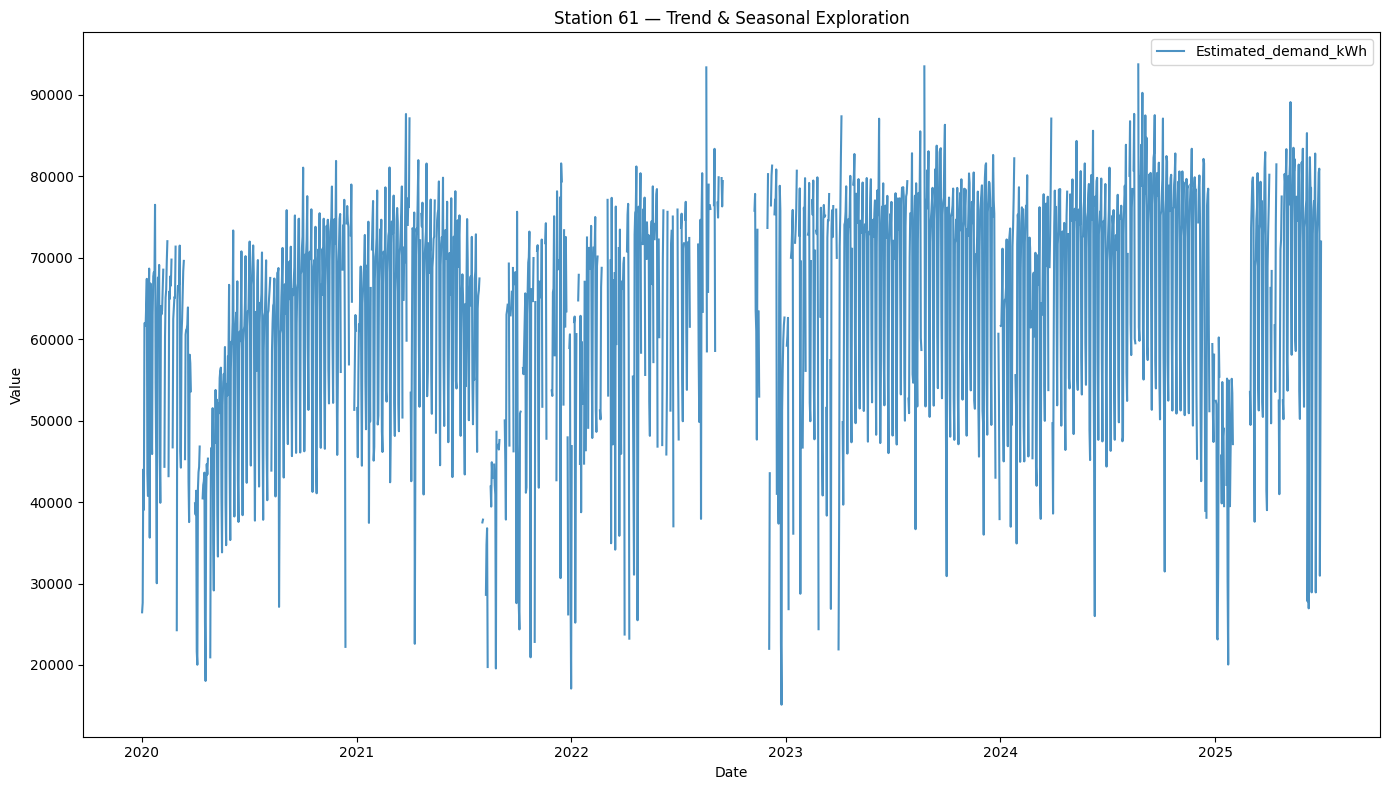

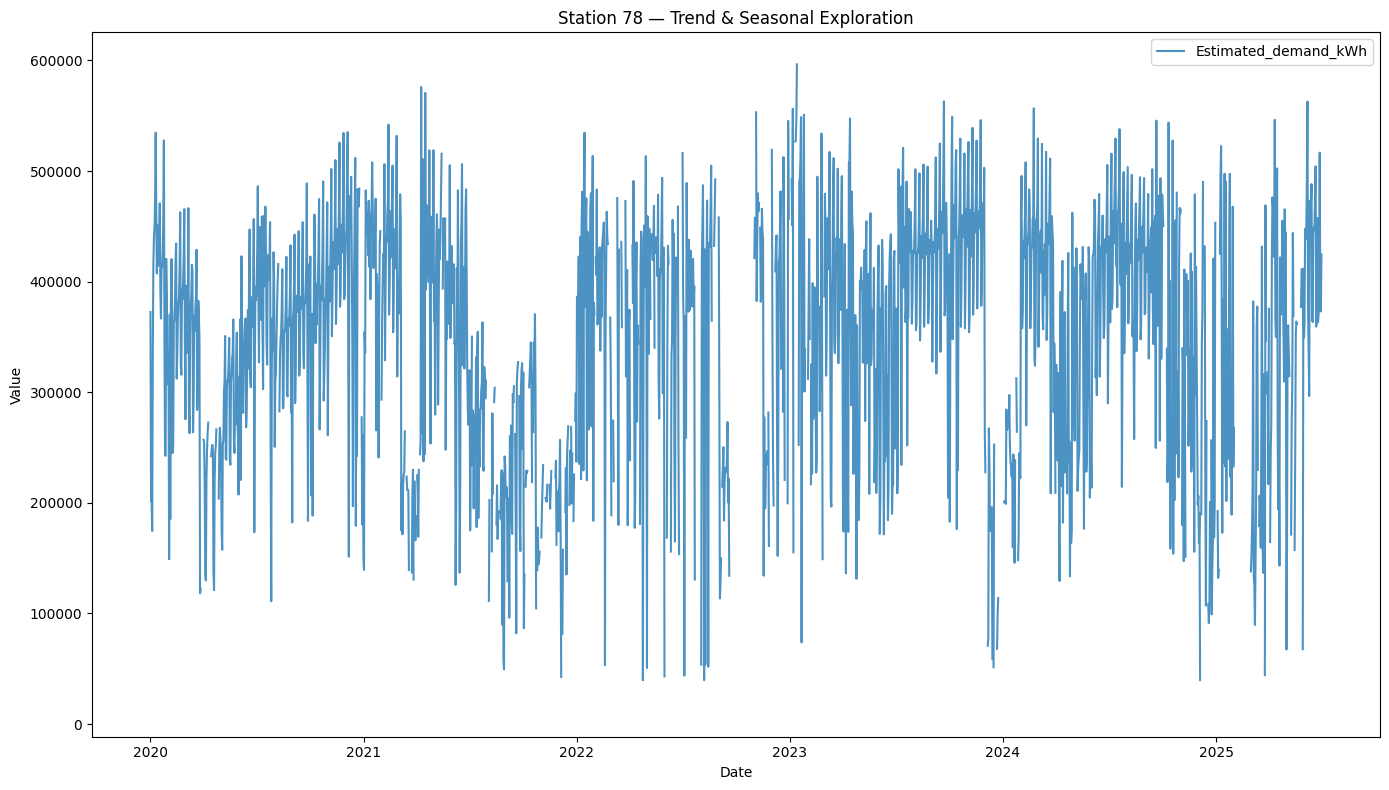

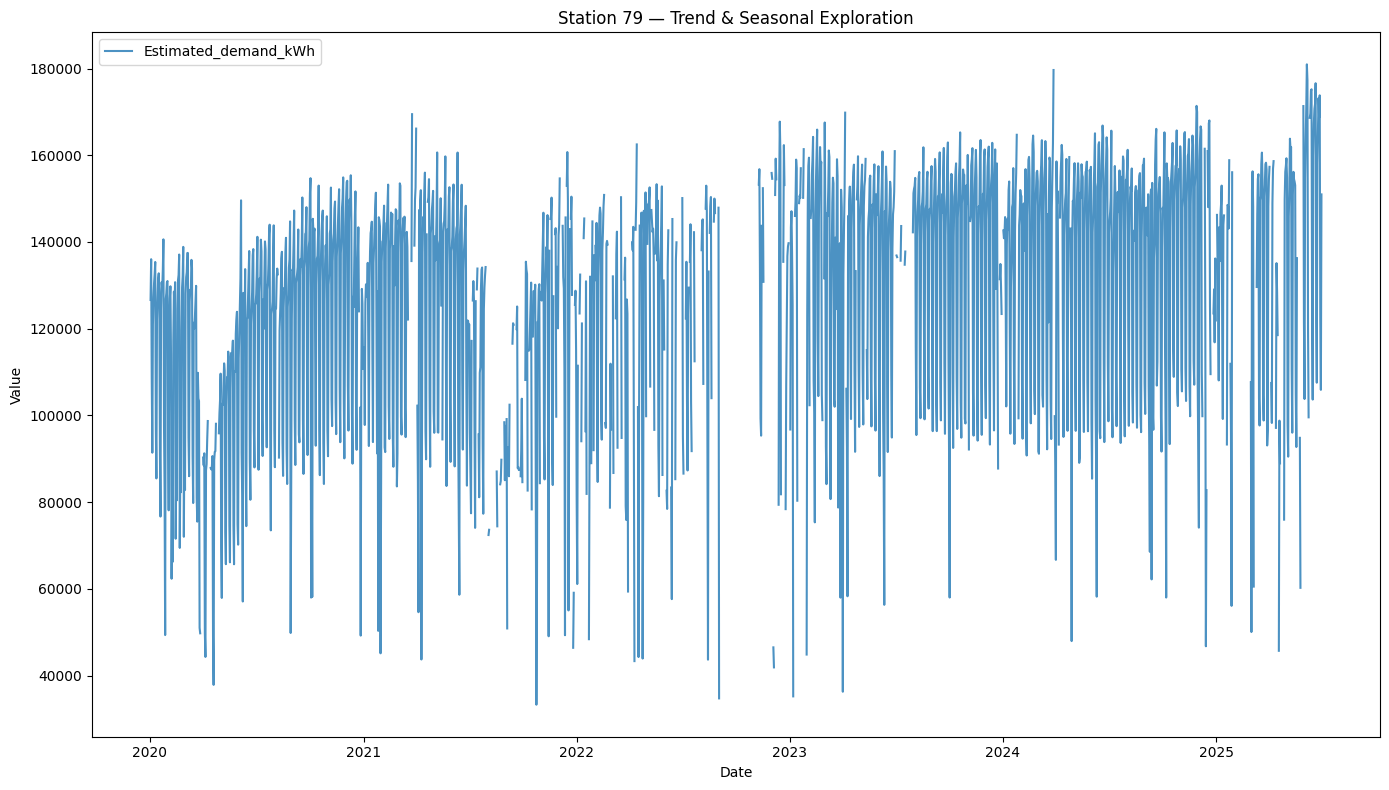

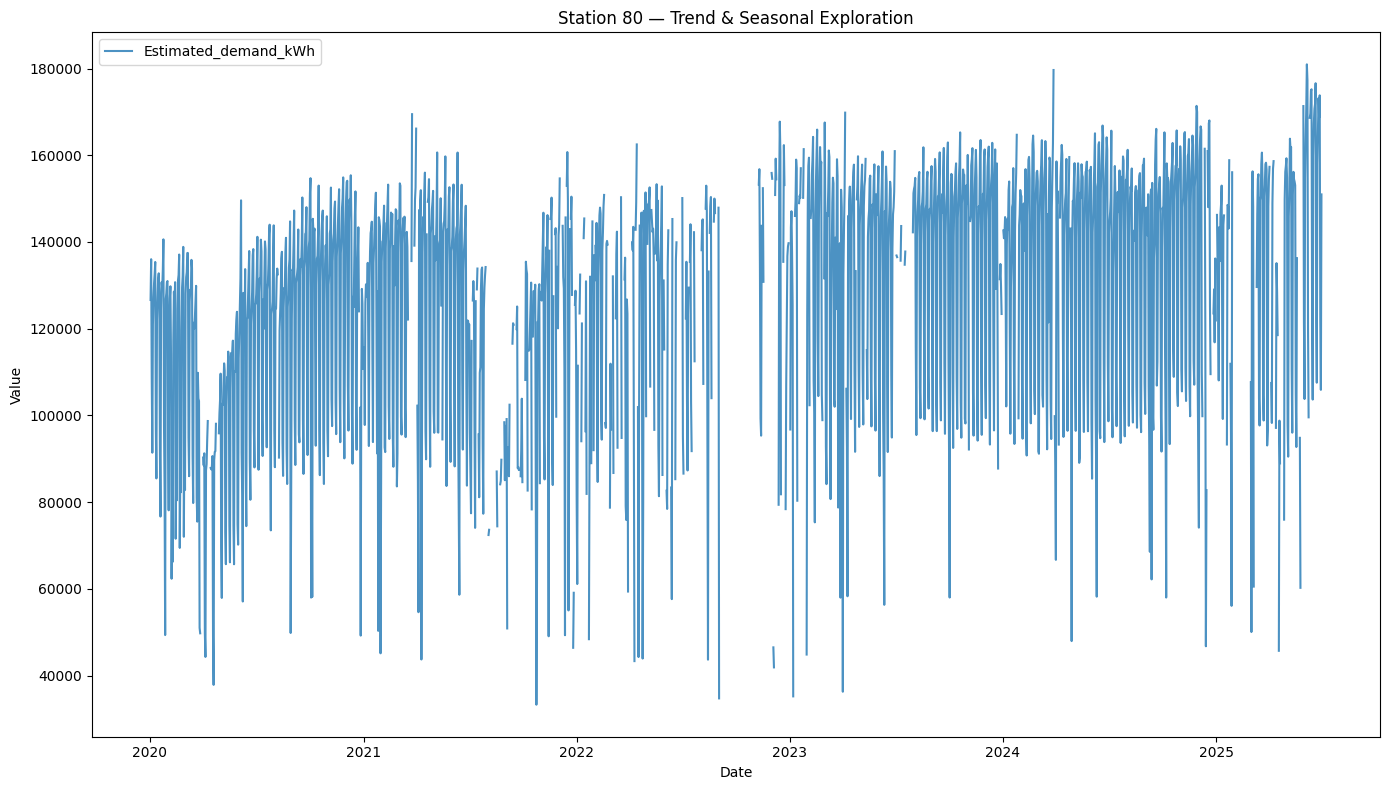

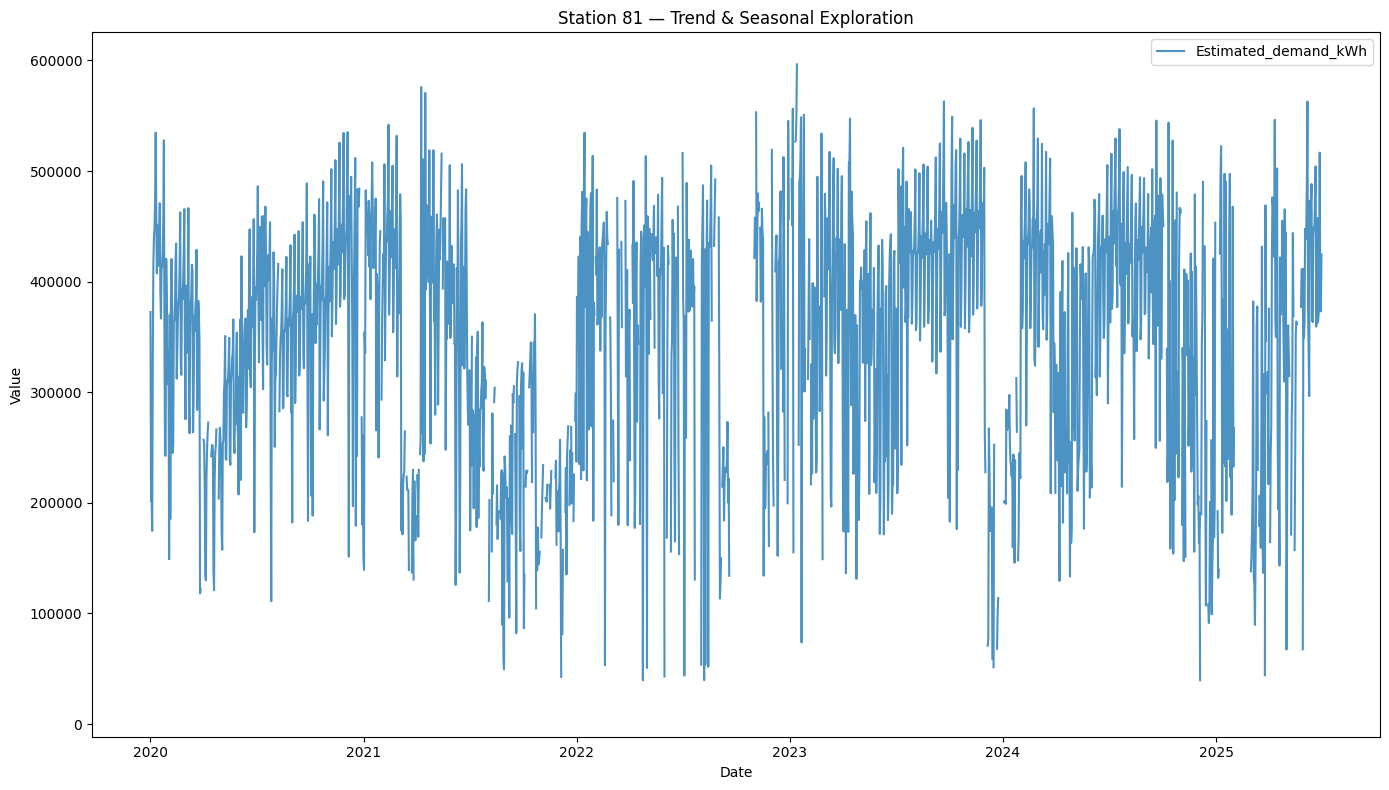

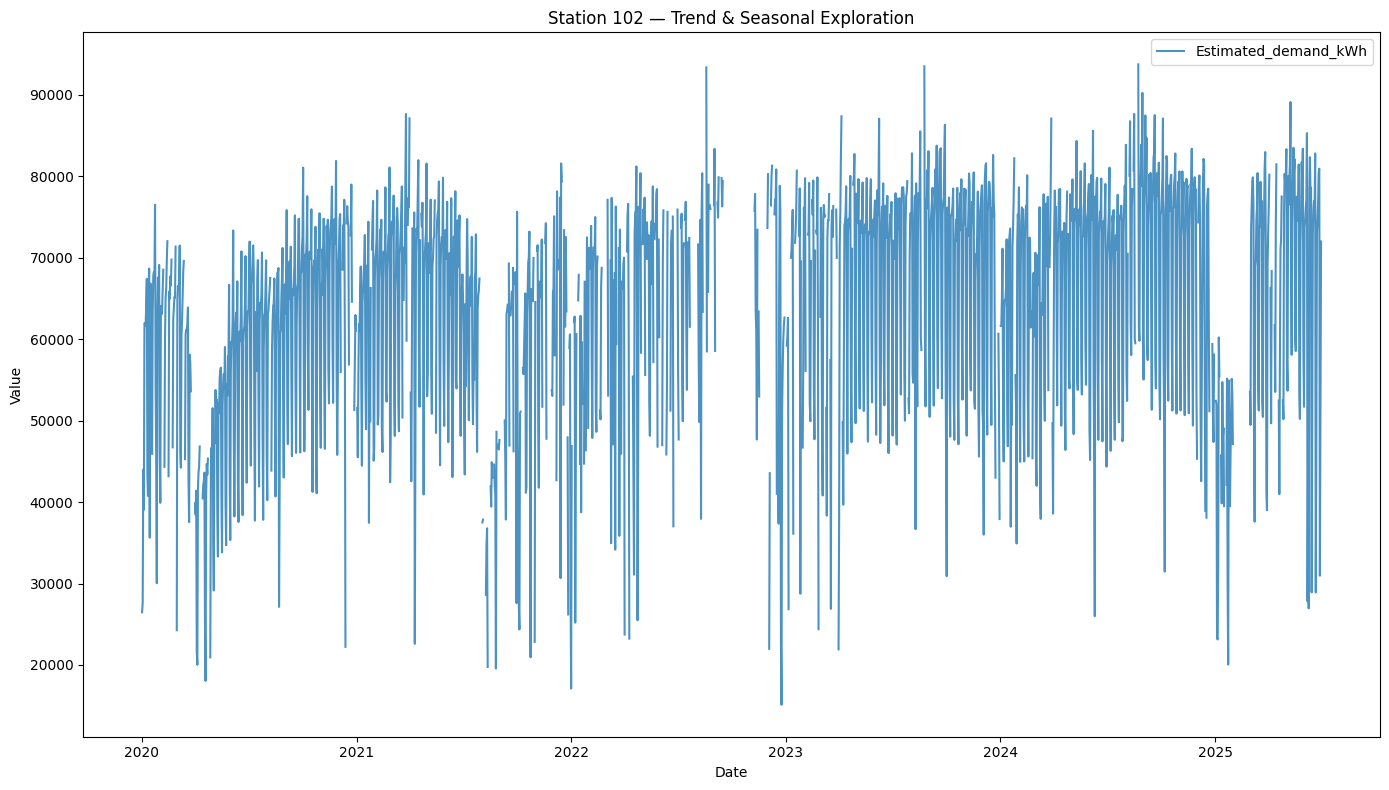

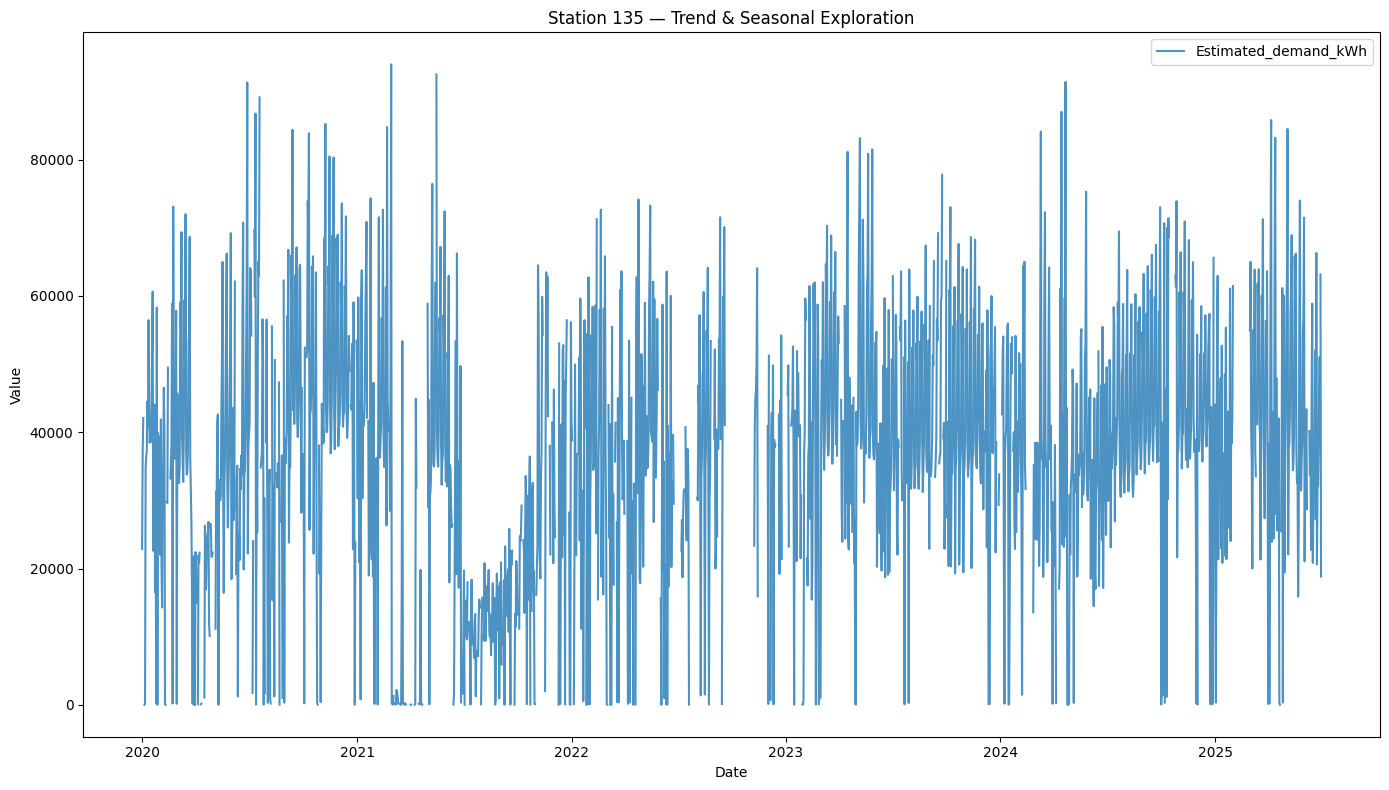

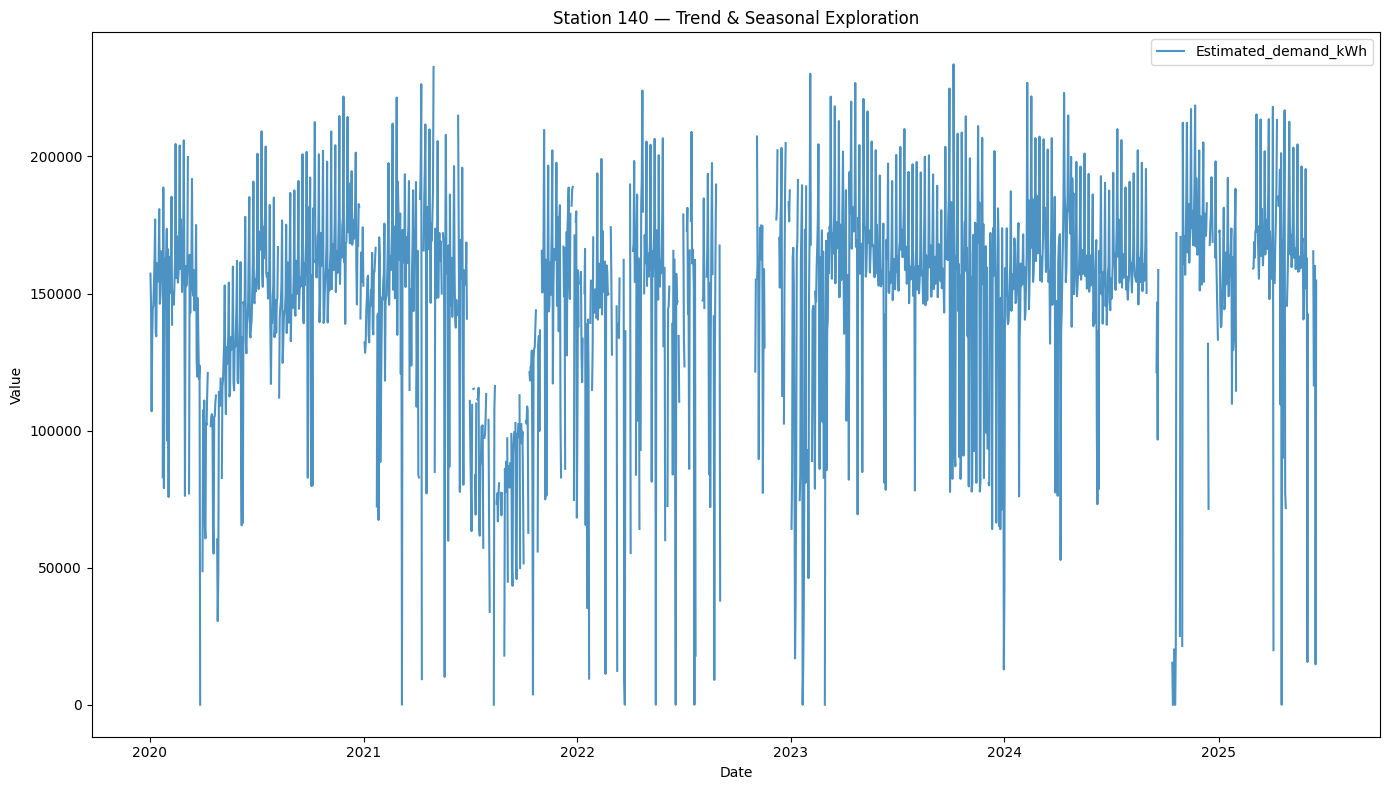

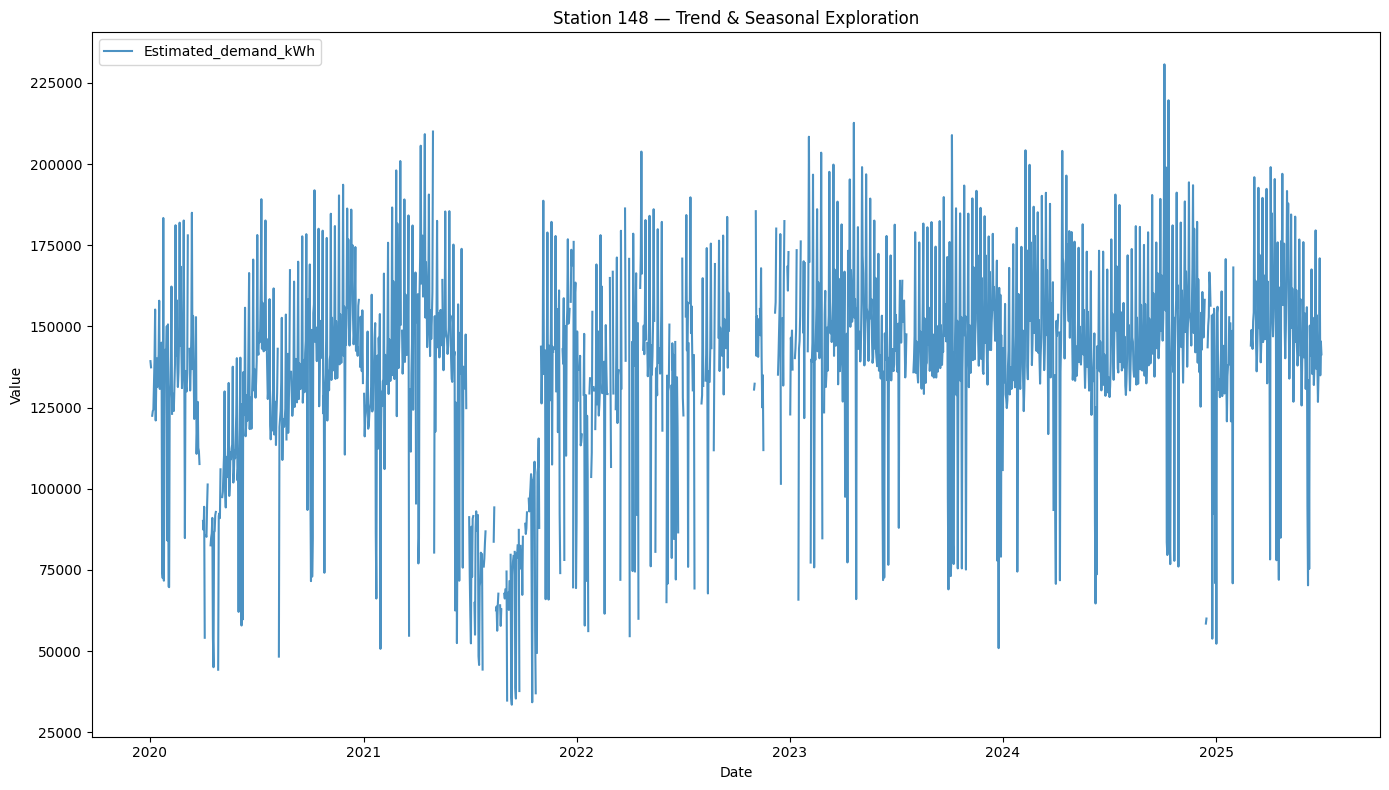

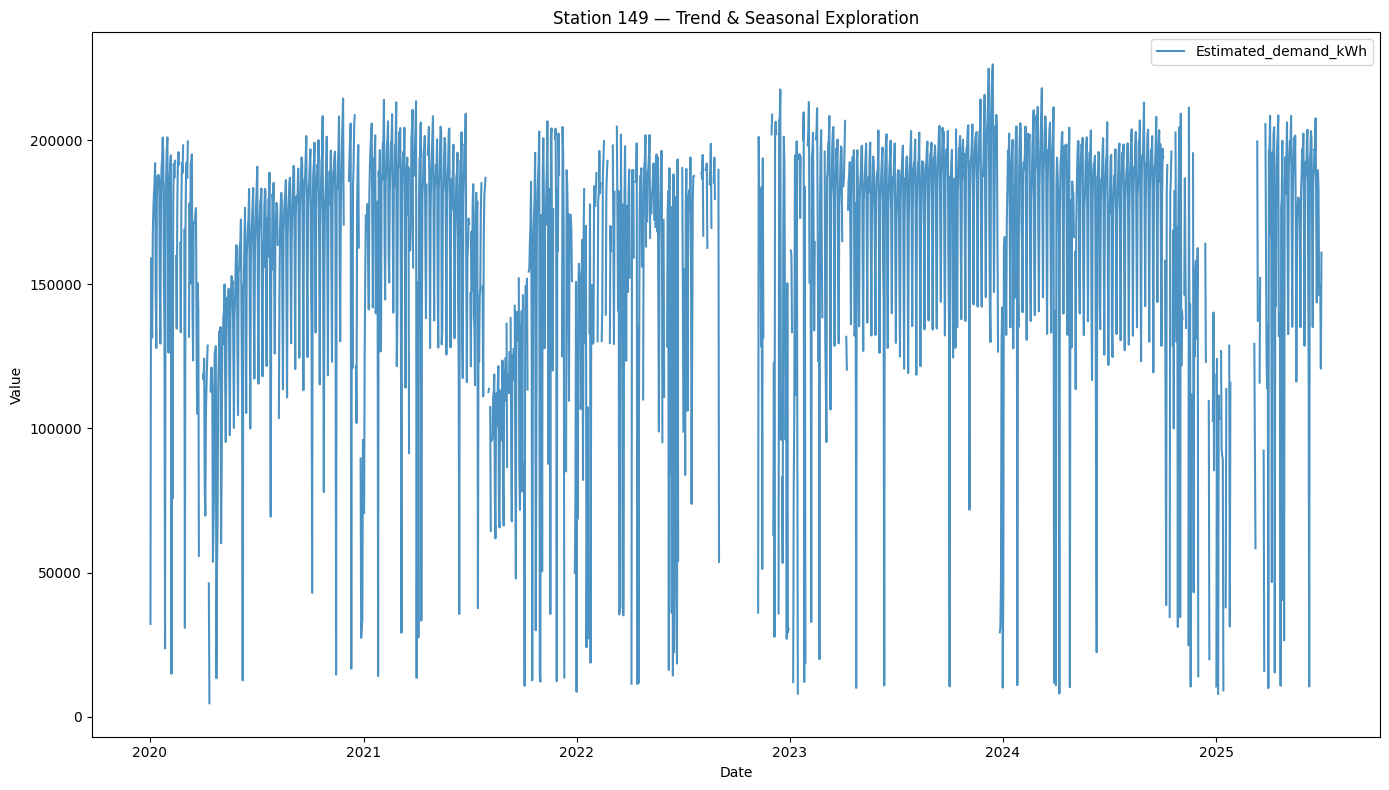

In [55]:
# Plot the first ten station
# Choose the first 10 station
first10_ids = filled_data['station_id'].unique()[:10]

for sid in first10_ids:
    sdf = filled_data[filled_data['station_id'] == sid].sort_values('Date')
    plt.figure(figsize=(14, 8))
    plt.plot(sdf['Date'], sdf['estimated_demand_kWh'], label='Estimated_demand_kWh', alpha=0.8)

    plt.title(f"Station {sid} — Trend & Seasonal Exploration")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [56]:
for sid, sdf in filled_data.groupby("station_id"):
    # Filling the missing value for day_of_week and is_weekend
    mask = sdf['day_of_week'].isna()
    sdf.loc[mask, 'day_of_week'] = sdf.loc[mask, 'Date'].dt.weekday + 1
    sdf['day_of_week'] = sdf['day_of_week'].astype('Int8')
    sdf['is_weekend'] = sdf['day_of_week'].apply(lambda x: 1 if x > 5 else 0).astype('Int8')


    # Filling the missing value for public_holiday
    holi_set = set(public_range.normalize())
    # Rule-based overwrite hoặc fill NaN
    sdf['public_holiday'] = (sdf['Date'].dt.normalize().isin(holi_set).astype('int8'))


    # Filling the missing value for school_holiday by applying linear interpolation (method='linear')
    sdf['school_holiday'] = sdf['school_holiday'].interpolate(method='linear', limit_direction='both').astype('int8')

    #Filling other missing values
    for c in add_feature_cols:
        sdf[c] = fill_missing_with_decompose(sdf[c], period=7, model="additive")

    for c in mul_feature_cols:
        sdf[c] = fill_missing_with_decompose(sdf[c], period=7, model="multiplicative")

    filled_data.loc[sdf.index] = sdf


In [57]:
filled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 632520 entries, 0 to 632519
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  632520 non-null  datetime64[ns]
 1   station_id            632520 non-null  int64         
 2   Station name          632520 non-null  object        
 3   Number of station     632520 non-null  float64       
 4   Number of plugs       632520 non-null  float64       
 5   Latitude              632520 non-null  float64       
 6   Longitude             632520 non-null  float64       
 7   day_of_week           632520 non-null  float64       
 8   public_holiday        632520 non-null  float64       
 9   school_holiday        632520 non-null  float64       
 10  Avg_Temp              632520 non-null  float64       
 11  Avg_Humidity          632520 non-null  float64       
 12  Avg_Wind              632520 non-null  float64       
 13 

In [58]:
#Double check again
filled_data.isna().sum()

,0
Date,0
station_id,0
Station name,0
Number of station,0
Number of plugs,0
Latitude,0
Longitude,0
day_of_week,0
public_holiday,0
school_holiday,0


In [ ]:
# Save the dataset
filled_data.to_csv("clean_data.csv", index=False)